In [1]:
!pip install plotly_express
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git
          

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-jemt9_qy
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-jemt9_qy
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit aac710a35f52bb78ab34d2e52517237941399eff
  Preparing metadata (setup.py) ... done
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4305 sha256=a6d5158ed74cc8f8b158cbff4f5ecfebb422d238069fc333fa21d8976d7dc18b
  Stored in directory: /tmp/pip-ephem-wheel-cache-znmc05m3/wheels/db/c1/1f/a2bb07bbb4a1ce3c43921252aeafaa6205f08637e292496f04
Successfully built NVCCPlugin


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import os
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
import sys
import torch
import torch.nn as nn
from patsy import dmatrices
import seaborn as sns

In [8]:
dataf = pd.read_excel('/content/sample_data/data_clean.xls')
dataf['id_province'] = dataf.groupby('provincia').ngroup()

In [12]:
y , data_X = dmatrices("precio ~ -1 + C(nmes) + year + C(id_province) + volumen", 
        data = dataf, return_type='dataframe')

In [13]:
data_X

,C(nmes)[1],C(nmes)[2],C(nmes)[3],C(nmes)[4],C(nmes)[5],C(nmes)[6],C(nmes)[7],C(nmes)[8],C(nmes)[9],C(nmes)[10],...,C(id_province)[T.22],C(id_province)[T.23],C(id_province)[T.24],C(id_province)[T.25],C(id_province)[T.26],C(id_province)[T.27],C(id_province)[T.28],C(id_province)[T.29],year,volumen
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997.0,2979.13
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997.0,79.44
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997.0,978.36
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997.0,1170.75
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997.0,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,9557.00
2907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2019.0,2867.00
2908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,4446.00
2909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,324.00


Definición de dataset de modelamiento

In [14]:
scaler = MinMaxScaler()
X = np.array(data_X)
scaler.fit(X)
X = scaler.transform(X)
X.shape

(2911, 43)

In [15]:
scaler.fit(y)
y = scaler.transform(y)
y.shape

(2911, 1)

Generamos el modelo

In [16]:
X_np = X.astype(np.float64)
y_np = y.astype(np.float32)
X_tn= torch.from_numpy(X_np)
y_tn = torch.from_numpy(y_np.reshape(-1, 1))
X_tn.shape, y_tn.shape

(torch.Size([2911, 43]), torch.Size([2911, 1]))

In [17]:
np.save('X_np.np', X_np)
np.save('y_np.np', y_np)

In [18]:
model = nn.Sequential(
  nn.Linear(43, 512),
  nn.ReLU(),
  nn.Linear(512, 128),
  nn.ReLU(),
  nn.Linear(128, 32),
  nn.ReLU(),
  nn.Linear(32, 4),
  nn.ReLU(),
  nn.Linear(4, 1),
)

In [19]:
optimizador = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0)
criterio = torch.nn.MSELoss()

In [20]:
torch.cuda.device_count(), torch.cuda.get_device_name(0)

(1, 'Tesla T4')

In [21]:
model.cuda()
X_g = X_tn.float().cuda()
y_g = y_tn.cuda()

In [22]:
X_g.shape, y_g.shape

(torch.Size([2911, 43]), torch.Size([2911, 1]))

In [23]:
errores = []
preds = []
nit = -1
EPOCS = 100000

In [ ]:
nit += 1
for epo in range(EPOCS):
  optimizador.zero_grad()
  y_pred = model(X_g)
  loss = criterio(y_pred, y_g)
  loss.backward()
  optimizador.step()
  if epo % int(EPOCS/10) == 0:
    print(epo, loss.item())
    errores.append([epo+nit*EPOCS, loss.item()])
    pred = y_pred.cpu().detach().numpy()
    preds.append(pred)

0 0.4848015010356903
10000 0.024039003998041153
20000 0.02353193797171116
30000 0.022837935015559196
40000 0.021861758083105087
50000 0.02059060148894787
60000 0.01929536461830139


## Simulation

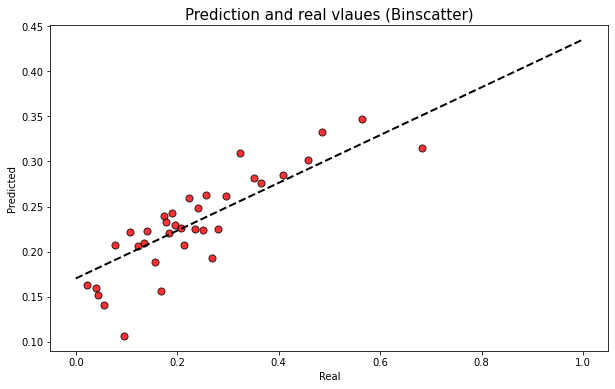

In [30]:
# Bin scatter plot 

f, ax = plt.subplots(figsize=(10, 6))

ax = sns.regplot(
    x = y_np, y = pred, x_bins=40, 
    order=1, x_estimator=np.mean, fit_reg=True, ci=None, 
    line_kws={'lw':2,'color':'black', 'linestyle':'--'},
    scatter_kws ={'edgecolors':(0, 0, 0), 'alpha':0.8, 'color':'red'}
    
)

plt.title('Prediction and real vlaues (Binscatter)', fontsize= 15)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

f.savefig('sccater.png', format='png')

In [43]:
# Silumation incremento del 15 % 
dataf['volumen2'] = dataf['volumen']*1.15

X_sim = dataf[ (dataf.nmes.isin([4,5,6])) & ( dataf.year.isin([2015,2016,2017,2018,2019] ) )]
y , data_X = dmatrices("precio ~ -1 + C(nmes) + year + C(id_province) + volumen2", 
        data = X_sim, return_type='dataframe')


In [45]:
# Trainning model 

scaler = MinMaxScaler()
X = np.array(data_X)
scaler.fit(X)
X = scaler.transform(X)
X.shape

scaler.fit(y)
y = scaler.transform(y)

X_np = X.astype(np.float64)
y_np = y.astype(np.float32)
X_tn= torch.from_numpy(X_np)
y_tn = torch.from_numpy(y_np.reshape(-1, 1))
X_tn.shape, y_tn.shape

np.save('X_np.np', X_np)
np.save('y_np.np', y_np)

model = nn.Sequential(
  nn.Linear(26, 512),
  nn.ReLU(),
  nn.Linear(512, 128),
  nn.ReLU(),
  nn.Linear(128, 32),
  nn.ReLU(),
  nn.Linear(32, 4),
  nn.ReLU(),
  nn.Linear(4, 1),
)

optimizador = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0)
criterio = torch.nn.MSELoss()

torch.cuda.device_count(), torch.cuda.get_device_name(0)

model.cuda()
X_g = X_tn.float().cuda()
y_g = y_tn.cuda()

errores = []
preds = []
nit = -1
EPOCS = 100000

nit += 1
for epo in range(EPOCS):
  optimizador.zero_grad()
  y_pred = model(X_g)
  loss = criterio(y_pred, y_g)
  loss.backward()
  optimizador.step()
  if epo % int(EPOCS/10) == 0:
    print(epo, loss.item())
    errores.append([epo+nit*EPOCS, loss.item()])
    pred = y_pred.cpu().detach().numpy()
    preds.append(pred)

0 0.40502694249153137
10000 0.07299213111400604
20000 0.04439902305603027
30000 0.03399192914366722
40000 0.02640138752758503
50000 0.019216131418943405
60000 0.013748022727668285
70000 0.010008195415139198
80000 0.00794269796460867
90000 0.0066589610651135445


In [46]:
data_1 = data_X[['year']]
data_1['precio'] =    pred      
data_1['estado'] = 'NN price predicction'
data_2 = data_X[['year']]
data_2['precio'] = y_np
data_2['estado'] = 'Real price'

data_plot = pd.concat([data_1, data_2
                      ])

data_plot

<ipython-input-46-942ce1d6d392>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['precio'] =    pred
<ipython-input-46-942ce1d6d392>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['estado'] = 'NN price predicction'
<ipython-input-46-942ce1d6d392>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,year,precio,estado
2324,2015.0,0.296561,NN price predicction
2325,2015.0,0.285340,NN price predicction
2326,2015.0,0.323389,NN price predicction
2327,2015.0,0.328225,NN price predicction
2328,2015.0,0.322134,NN price predicction
...,...,...,...
2842,2019.0,0.763636,Real price
2843,2019.0,0.763636,Real price
2844,2019.0,0.763636,Real price
2845,2019.0,0.763636,Real price


<ipython-input-47-88964e258dfe>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot( x = "year", y = "precio",


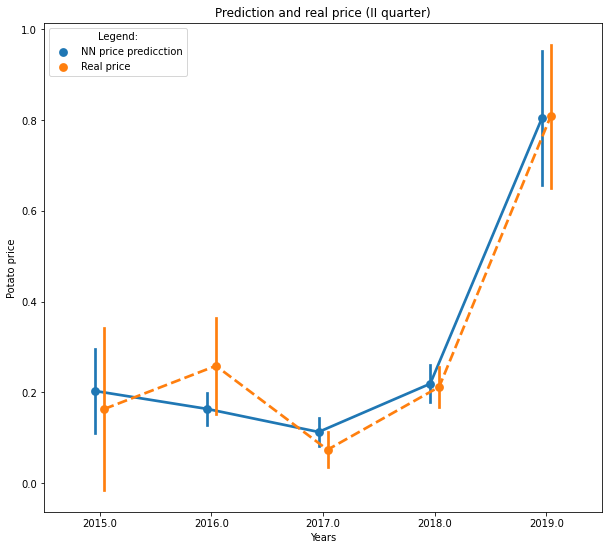

In [47]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "year", y = "precio", 
               data = data_plot, ci = 'sd',  hue = 'estado',
             dodge = 0.08, linestyles = [ "-", "--" ] )

# x label
plt.xlabel( "Years" )
plt.ylabel( "Potato price" )

# Change legend title
plt.legend( title =  "Legend:" )
plt.title( 'Prediction and real price (II quarter)' )

plt.savefig('plot_simulation_1.png', format='png')

0 0.13671816885471344
10000 0.0770830437541008
20000 0.04728657379746437
30000 0.04033356159925461
40000 0.034684550017118454
50000 0.027961110696196556
60000 0.021051175892353058
70000 0.014733396470546722
80000 0.010427920147776604
90000 0.00793145876377821


<ipython-input-49-0a04603927c0>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['precio'] =    pred
<ipython-input-49-0a04603927c0>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['estado'] = 'NN price predicction'
<ipython-input-49-0a04603927c0>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

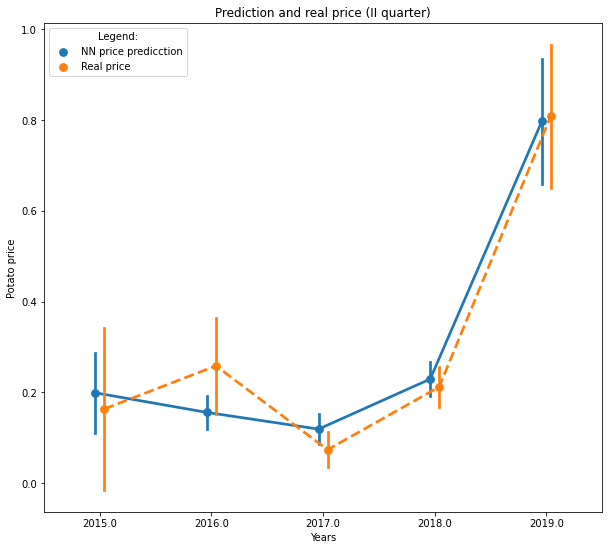

In [49]:
# simulation incremento de 50%
dataf['volumen2'] = dataf['volumen']*1.5

X_sim = dataf[ (dataf.nmes.isin([4,5,6])) & ( dataf.year.isin([2015,2016,2017,2018,2019] ) )]
y , data_X = dmatrices("precio ~ -1 + C(nmes) + year + C(id_province) + volumen2", 
        data = X_sim, return_type='dataframe')

# Trainning model 

scaler = MinMaxScaler()
X = np.array(data_X)
scaler.fit(X)
X = scaler.transform(X)
X.shape

scaler.fit(y)
y = scaler.transform(y)

X_np = X.astype(np.float64)
y_np = y.astype(np.float32)
X_tn= torch.from_numpy(X_np)
y_tn = torch.from_numpy(y_np.reshape(-1, 1))
X_tn.shape, y_tn.shape

np.save('X_np.np', X_np)
np.save('y_np.np', y_np)

model = nn.Sequential(
  nn.Linear(26, 512),
  nn.ReLU(),
  nn.Linear(512, 128),
  nn.ReLU(),
  nn.Linear(128, 32),
  nn.ReLU(),
  nn.Linear(32, 4),
  nn.ReLU(),
  nn.Linear(4, 1),
)

optimizador = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0)
criterio = torch.nn.MSELoss()

torch.cuda.device_count(), torch.cuda.get_device_name(0)

model.cuda()
X_g = X_tn.float().cuda()
y_g = y_tn.cuda()

errores = []
preds = []
nit = -1
EPOCS = 100000

nit += 1
for epo in range(EPOCS):
  optimizador.zero_grad()
  y_pred = model(X_g)
  loss = criterio(y_pred, y_g)
  loss.backward()
  optimizador.step()
  if epo % int(EPOCS/10) == 0:
    print(epo, loss.item())
    errores.append([epo+nit*EPOCS, loss.item()])
    pred = y_pred.cpu().detach().numpy()
    preds.append(pred)


data_1 = data_X[['year']]
data_1['precio'] =    pred      
data_1['estado'] = 'NN price predicction'
data_2 = data_X[['year']]
data_2['precio'] = y_np
data_2['estado'] = 'Real price'
data_plot = pd.concat([data_1, data_2
                      ])



# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "year", y = "precio", 
               data = data_plot, ci = 'sd',  hue = 'estado',
             dodge = 0.08, linestyles = [ "-", "--" ] )

# x label
plt.xlabel( "Years" )
plt.ylabel( "Potato price" )

# Change legend title
plt.legend( title =  "Legend:" )
plt.title( 'Prediction and real price (II quarter)' )

plt.savefig('plot_simulation_2.png', format='png')